# Yet another `planning` tutorials

This is Tutorial about `Robot path planning` methods. I will implement Dijkstra, A-star, RRT, Particle filters, and so on.

## Dijkstra

In [1]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0    # the start node is zero.

    queue = []
    heapq.heappush(queue, [distances[start], start])    # begin searching at start node.

    while queue:
        # pop at the most right ones.
        curr_dist, curr_dest = heapq.heappop(queue)    # get node, distance

        if distances[curr_dest] < curr_dist:    # if the destination dist is longer, no longer to search.
            continue

        for new_dest, new_dist in graph[curr_dest].items():
            distance = curr_dist + new_dist     # the overall distance when pass this node.

            if distance < distances[new_dest]:  # update when smaller than the known node distance.
                distances[new_dest] = distance  
                heapq.heappush(queue, [distance, new_dest]) # for calculate next nearset, push at queue
    
    return distances


In [2]:
graph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}

graph   # dict type

{'A': {'B': 8, 'C': 1, 'D': 2},
 'B': {},
 'C': {'B': 5, 'D': 2},
 'D': {'E': 3, 'F': 5},
 'E': {'F': 1},
 'F': {'A': 5}}

In [3]:
dijkstra(graph, 'A')

{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}

## A Star

### `A star` pseudo code
// A* (star) Pathfinding

// Initialize both open and closed list
let the openList equal empty list of nodes
let the closedList equal empty list of nodes

// Add the start node
put the startNode on the openList (leave it's f at zero)

// Loop until you find the end
while the openList is not empty
    
    // Get the current node
    let the currentNode equal the node with the least f value
    remove the currentNode from the openList
    add the currentNode to the closedList
    
    // Found the goal
    if currentNode is the goal
        Congratz! You've found the end! Backtrack to get path

    // Generate children
    let the children of the currentNode equal the adjacent nodes
    
    for each child in the children
        // Child is on the closedList
        if child is in the closedList
            continue to beginning of for loop
        // Create the f, g, and h values
        child.g = currentNode.g + distance between child and current
        child.h = distance from child to end
        child.f = child.g + child.h
        // Child is already in openList
        if child.position is in the openList's nodes positions
            if the child.g is higher than the openList node's g
                continue to beginning of for loop
        // Add the child to the openList
        add the child to the openList

In [4]:
import numpy as np

class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent        # 이전 노드
        self.position = position    # 현재 위치

        self.f  = 0
        self.g  = 0
        self.h  = 0
    
    def __eq__(self, other):
        return self.position == other.position


In [5]:
def calculate_heuristic(curr_node, dest_node):
    distance = np.sqrt((dest_node.position[0] - curr_node.position[0]) ** 2 + (dest_node.position[1] - curr_node.position[1]) ** 2)

    return distance

In [6]:
start_node = Node(None, (0, 0))

start_node.position

end_node = Node(None, (3, 4))

end_node.position

calculate_heuristic(start_node, end_node)

5.0

In [8]:
def astar(maze, start, end):
    start_node  = Node(None, start) # start position: (x, y)
    end_node    = Node(None, end)   # end position: (x, y)

    openlist    = []
    closedlist  = []

    openlist.append(start_node)

    while openlist:
        # Initialize current node.
        current_node    = openlist[0]
        current_idx     = 0

        for idx, item in enumerate(openlist):
            # search openlist nodes that have minimum cost F.
            if item.f < current_node.f:
                current_node    = item
                current_idx     = idx

        # delete in openlist, and append in closedlist.
        openlist.pop(current_idx)
        closedlist.append(current_node)

        # when the search is finished.
        if current_node == end_node:
            path = []
            current = current_node

            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]   # return reversed.

        
        # generate children
        children = []

        # Adjacent squares
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: 
            # get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # check the position is within the maze.
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # collision check.
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        for child in children:
            for closed_child in closedlist:
                if child == closed_child:
                    continue
            
            child.g = current_node.g + 1
            # child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.h = calculate_heuristic(child, end_node)
            child.f = child.g + child.h

            for open_node in openlist:
                if child == open_node and child.g > open_node.g:
                    continue

            openlist.append(child)        

In [9]:
# define Maze.
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (0, 0)
end = (7, 6)

path = astar(maze, start, end)
print(path)


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]


## RRT

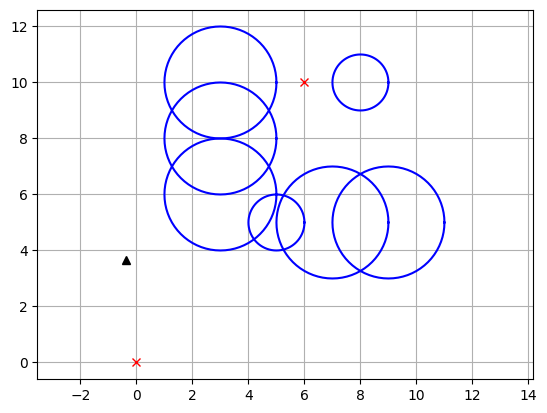

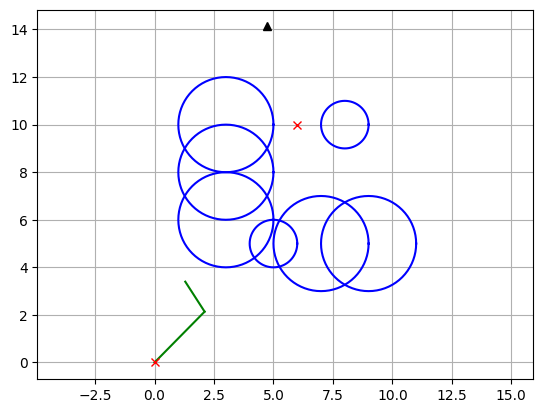

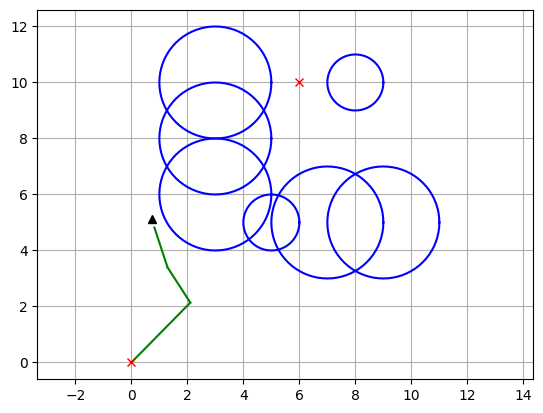

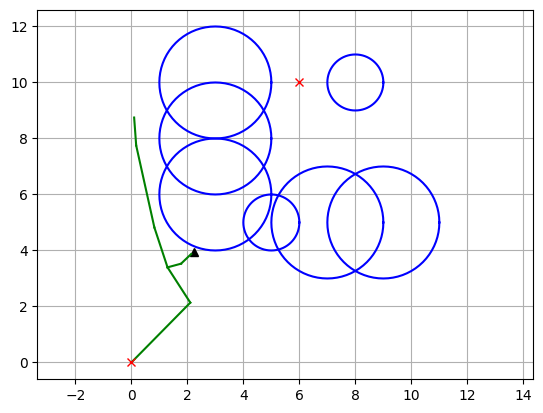

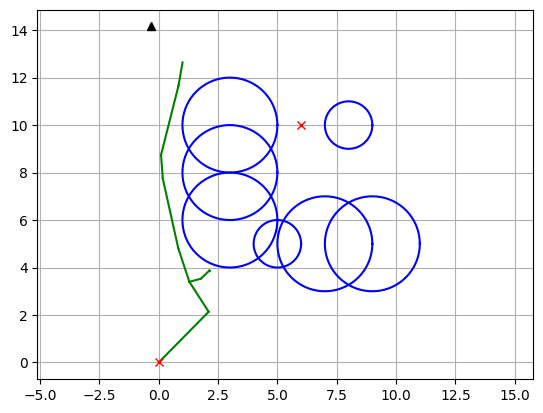

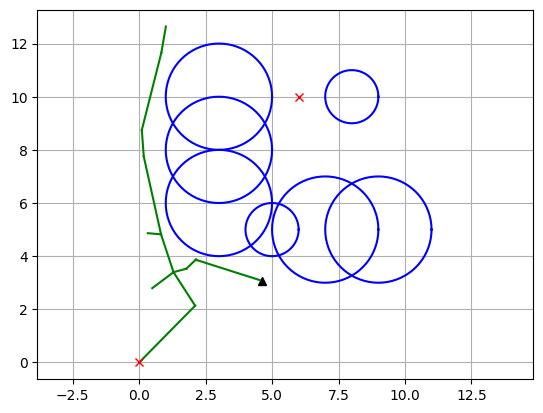

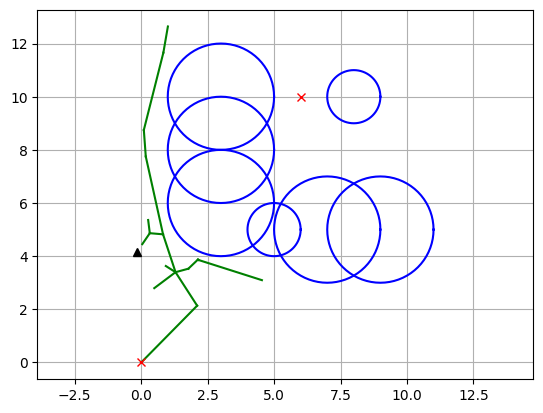

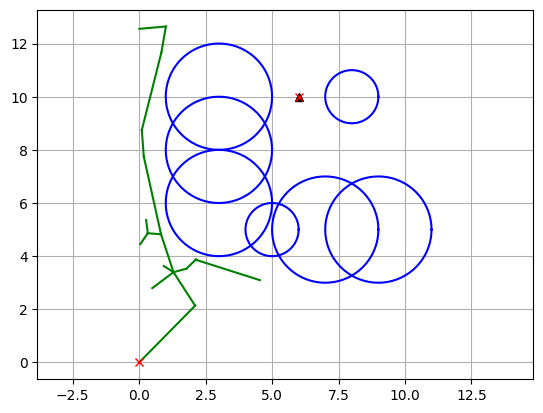

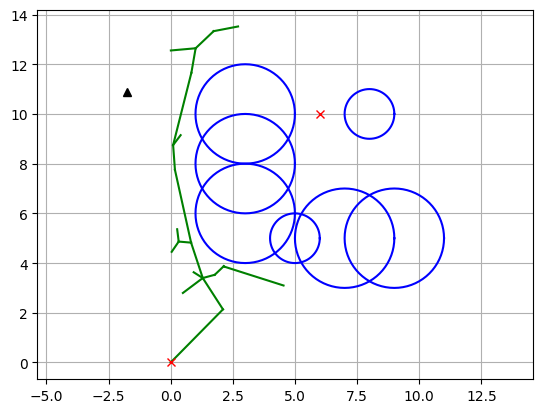

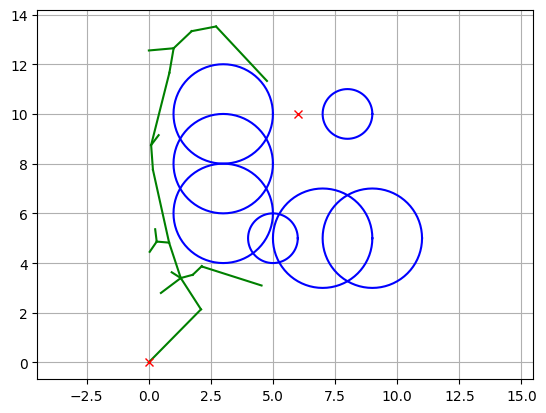

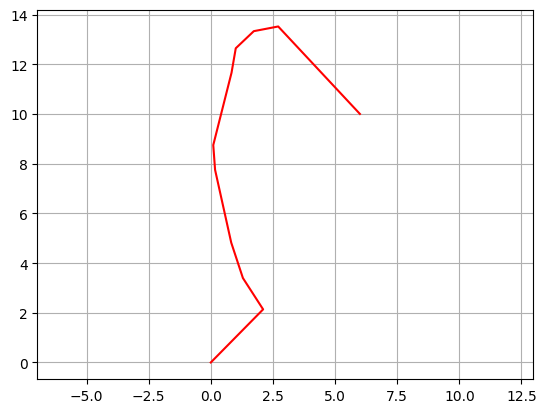

In [5]:
import random
import math
import numpy as np

class RRT:
    class Node:
        """
            RRT Node class
        """
        def __init__(self, x, y):
            self.x = x
            self.y = y
            self.path_x = []
            self.path_y = []
            self.parent = None

    class Workspace:
        """
            Robot Workspace class (constraint about workspace that can be sampled.)
        """
        def __init__(self, area):
            self.xmin = float(area[0])
            self.xmax = float(area[1])
            self.ymin = float(area[2])
            self.ymax = float(area[3])

    def __init__(self,
                 start,
                 goal,
                 obstacle_list,
                 rand_area_x,
                 rand_area_y,
                 expand_distance=3.0,
                 path_resolution=0.5,
                 goal_sample_rate=5,
                 max_iter=500,
                 workspace=None):
        self.start = self.Node(start[0], start[1])
        self.goal = self.Node(goal[0], goal[1])
        # it could be expand to each coordinate.
        self.min_rand_x = rand_area_x[0]
        self.max_rand_x = rand_area_x[1]
        self.min_rand_y = rand_area_y[0]
        self.max_rand_y = rand_area_y[1]
        self.expand_distance = expand_distance
        self.path_resolution = path_resolution
        self.goal_sample_rate = goal_sample_rate
        self.max_iter = max_iter
        self.obstacle_list = obstacle_list
        self.node_list = []

        if workspace is not None:
            self.workspace = self.Workspace(workspace)
        else:
            self.workspace = None

    def plan(self, verbose=True):
        self.node_list = [self.start]   # start with init position
        for i in range(self.max_iter):
            random_node = self.get_random_node()
            nearest_index = self.get_nearest_node_index(self.node_list, random_node)
            nearest_node = self.node_list[nearest_index]

            new_node = self.steer(nearest_node, random_node, self.expand_distance)
            
            if self.check_collision(new_node, self.obstacle_list) and \
               self.check_workspace(new_node, self.workspace):
                self.node_list.append(new_node)
            if verbose and i % 5 == 0:
                self.visualize(random_node)

            if self.calculate_dist_to_goal(self.node_list[-1].x, self.node_list[-1].y) <= self.expand_distance:
                final_node = self.steer(self.node_list[-1], self.goal, self.expand_distance)

                if self.check_collision(final_node, self.obstacle_list):
                    return self.generate_final_path(len(self.node_list) - 1)

        return None # can't find path.

    def get_random_node(self):
        if random.randint(0, 100) > self.goal_sample_rate:
            random_node = self.Node(random.uniform(self.min_rand_x, self.max_rand_x),
                                    random.uniform(self.min_rand_y, self.max_rand_y))
        else:
            random_node = self.Node(self.goal.x, self.goal.y)
        return random_node

    def get_nearest_node_index(self, node_list, random_node):
        distance_list = [(node.x - random_node.x)**2 + (node.y - random_node.y)**2 for node in node_list]
        min_index = distance_list.index(min(distance_list))
        return min_index

    def steer(self, nearest_node, random_node, expand_distance):
        new_node = self.Node(nearest_node.x, nearest_node.y)
        distance_random, theta = self.calculate_dist_theta(new_node, random_node)

        new_node.path_x = [new_node.x]
        new_node.path_y = [new_node.y]

        if expand_distance > distance_random:
            expand_distance = distance_random

        n_expand = math.floor(expand_distance / self.path_resolution)

        for _ in range(n_expand):
            new_node.x += self.path_resolution * math.cos(theta)
            new_node.y += self.path_resolution * math.sin(theta)
            new_node.path_x.append(new_node.x)
            new_node.path_y.append(new_node.y)

        distance_nearest, _ = self.calculate_dist_theta(new_node, nearest_node)
        if distance_nearest <= self.path_resolution:
            new_node.x = random_node.x
            new_node.y = random_node.y
            new_node.path_x.append(random_node.x)
            new_node.path_y.append(random_node.y)

        new_node.parent = nearest_node

        return new_node

    def calculate_dist_to_goal(self, x, y):
        dx = x - self.goal.x
        dy = y - self.goal.y
        return math.hypot(dx, dy)
    
    def generate_final_path(self, goal_index):
        path = [[self.goal.x, self.goal.y]]
        node = self.node_list[goal_index]

        while node.parent is not None:
            path.append((node.x, node.y))
            node = node.parent

        path.append([node.x, node.y])

        return path

    def visualize(self, random_node=None):
        plt.clf()   # clear plt figure

        if random_node is not None:
            plt.plot(random_node.x, random_node.y, "^k")
        for node in self.node_list:
            if node.parent:
                plt.plot(node.path_x, node.path_y, "-g")

        for (ox, oy, size) in self.obstacle_list:
            degree = list(range(0, 360, 5))
            degree.append(0)
            xl = [ox + size * math.cos(np.deg2rad(d)) for d in degree]
            yl = [oy + size * math.sin(np.deg2rad(d)) for d in degree]
            plt.plot(xl, yl, "-b")

        plt.plot(self.start.x, self.start.y, "xr")
        plt.plot(self.goal.x, self.goal.y, "xr")
        plt.axis("equal")
        plt.grid(True)
        plt.show()


    @staticmethod
    def calculate_dist_theta(from_node, to_node):
        dx = to_node.x - from_node.x
        dy = to_node.y - from_node.y

        distance = math.hypot(dx, dy) # calculate hypotenuse
        theta = math.atan2(dy, dx)
        return distance,theta

    @staticmethod
    def check_collision(node, obstacle_list):
        if node is None:
            return False    # collision
        
        for (ox, oy, size) in obstacle_list:    # obstacle [x, y, size]
            dx_list = [ox - x for x in node.path_x]
            dy_list = [oy - y for y in node.path_y]
            distance_list = [dx*dx + dy*dy for (dx, dy) in zip(dx_list, dy_list)]

            if min(distance_list) <= size**2:
                return False    # collision
            
        return True # no collision

    @staticmethod
    def check_workspace(node, workspace):
        if workspace is None:
            return True # No workspace was defined.

        if node.x < workspace.xmin or node.x > workspace.xmax or \
           node.y < workspace.ymin or node.y > workspace.ymax:
            return False    # outside of workspace
        else:
            return True     # inside of workspace


# ====Search Path with RRT====
obstacleList = [(5, 5, 1), (3, 6, 2), (3, 8, 2), (3, 10, 2), (7, 5, 2),
                (9, 5, 2), (8, 10, 1)]  # [x, y, radius]
    
rrt = RRT(
    start=[0, 0],
    goal=[6.0, 10.0],
    rand_area_x=[-2, 5],
    rand_area_y=[0, 15],
    obstacle_list=obstacleList,
    workspace=[0, 10, 0, 14]
    )
path = rrt.plan(verbose=True)

if path is not None:
    rrt.visualize()
    plt.plot([x for (x, y) in path], [y for (x, y) in path], '-r')
    plt.axis('equal')
    plt.grid(True)
    plt.pause(0.01)  # Need for Mac
    plt.show()



## RRT-Star